In [1]:
from importlib import import_module
import tensorflow as tf
import keras
from keras.api._v2 import keras as KerasAPI
keras: KerasAPI = import_module("tensorflow.keras")
print(tf.__version__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils import plot_model

from keras.utils import load_img
from keras.utils import img_to_array

import os

from sklearn.preprocessing import LabelEncoder

2.9.0


In [2]:
path = ''
# from google.colab import drive
# drive.mount('/content/drive')
# path = '/content/drive/MyDrive/deepLearningAs3/'

pathfinal = path + 'model_history/'
pathload = path + 'resultModel/'

epoch_val = 3000
batch_size_val = 1
threshold_val = 1e-4

random_state_global = 42
learning_rate_val = 1e-3
momentum_val = 0.9

Hidden_layer_I_N = 20
Hidden_layer_II_N = 15
Hidden_layer_III_N = 10
Output_layer_N = 5

Hidden_layer_Activation = "tanh"
Output_layer_Activation = "softmax"

ema_momentum_val = 0.99 # beta
epsilon_val = 1e-8
beta_1_val = 0.9
beta_2_val = 0.999

i = 'a'
ii = 'a'
iii = 'a'
iv = 'a'
v = 'a'
vi = 'a'
vii = 'a'
al = 'a'

epoch_val_a = epoch_val
batch_size_val_a = batch_size_val

epoch_val_b = 30000
batch_size_val_b = 11385 # df_train.shape[0] # 11385

epoch_val_c = epoch_val
batch_size_val_c = batch_size_val

epoch_val_d = epoch_val
batch_size_val_d = batch_size_val

epoch_val_e = epoch_val
batch_size_val_e = batch_size_val

epoch_val_f = epoch_val
batch_size_val_f = batch_size_val

epoch_val_g = epoch_val
batch_size_val_g = batch_size_val

class_l_r_to_d = {0:0, 1:1, 2:2, 4:3, 9:4}
class_l_d_to_r = {0:0, 1:1, 2:2, 3:4, 4:9}

read and saving data

In [3]:
%%script echo skipping
# level 0 path
l0 = 'Group_20'

DATASET = {0:pd.DataFrame(), 1:pd.DataFrame(), 2:pd.DataFrame()}
temp_dict = {'train':0, 'val':1, 'test':2}

# iterate over files in
# that l0
for l1 in os.listdir(l0):
    f1 = os.path.join(l0, l1)
    for l2 in os.listdir(f1):
        f2 = os.path.join(f1, l2)
        for l3 in os.listdir(f2):
            f3 = os.path.join(f2, l3)
            # print(f3)
            img = load_img(f3, color_mode = "grayscale")
            data_point = tf.squeeze(tf.constant(img_to_array(img)))
            # print("shape:", data_point.shape) # shape: (28, 28)
            # data_point = data_point/255
            # print(tf.math.reduce_min(data_point), tf.math.reduce_max(data_point))
            # plt.imshow(data_point)
            # plt.show()

            temp = tf.reshape(data_point, shape=[-1]).numpy().tolist()
            
            #appending label
            temp.append(int(l2))

            # print("shape:",temp.shape) #shape: (784,)
            row = pd.Series(temp)
            # print('1')
            DATASET[temp_dict[l1]] = pd.concat([DATASET[temp_dict[l1]], row], axis=1)
            # plt.imshow(tf.reshape(temp, shape=(28,28)))
            # plt.show()


df_train = DATASET[0].transpose()
df_valid = DATASET[1].transpose()
df_test = DATASET[2].transpose()

## saving data
df_train.to_csv('df_train.csv', index=False)
df_valid.to_csv('df_valid.csv', index=False)
df_test.to_csv('df_test.csv', index=False)

skipping


In [4]:
def label_encoding(df):
    df[df.columns[-1]] = LabelEncoder().fit_transform(df.iloc[:,-1])
    return df

def normalizing_data(df):
    temp = df[df.columns[-1]]
    df = df/255
    df[df.columns[-1]] = temp
    return df

# plt.figure(figsize=(7, 10))
def data_visualize(df):
  np.random.seed(random_state_global)
  plt.figure(figsize=(12, 12))
  for i in range(9):
    plt.subplot(3, 3, i + 1)
    rand_index = np.random.choice(range(len(df)))
    plt.imshow(tf.reshape(df.iloc[rand_index,:-1], shape=(28,28)), cmap=plt.cm.binary)
    plt.title(f'{class_l_d_to_r[df.iloc[rand_index,-1]]}')
    # plt.axis(False)
  plt.tight_layout()

In [5]:
df_train = pd.read_csv(path+'df_train.csv', dtype='float32')
df_valid = pd.read_csv(path+'df_valid.csv', dtype='float32')
df_test = pd.read_csv(path+'df_test.csv', dtype='float32')

print('df_train:', df_train.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_valid:', df_valid.groupby(['784']).count().iloc[:,-1].to_dict())
print('df_test:', df_test.groupby(['784']).count().iloc[:,-1].to_dict())
print()

print(f'Initial Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')

df_train = label_encoding(normalizing_data(df_train))
df_valid = label_encoding(normalizing_data(df_valid))
df_test = label_encoding(normalizing_data(df_test))
print(f'Final Data Range: {min(df_train.iloc[:,:-1].min())} to {max(df_train.iloc[:,:-1].max())}')
print('Label Encoded')

print('Train Data',df_train.shape)
print('Valid Data',df_valid.shape)
print('Test Data' ,df_test.shape)

df_train: {0.0: 2277, 1.0: 2277, 2.0: 2277, 4.0: 2277, 9.0: 2277}
df_valid: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}
df_test: {0.0: 759, 1.0: 759, 2.0: 759, 4.0: 759, 9.0: 759}

Initial Data Range: 0.0 to 255.0
Final Data Range: 0.0 to 1.0
Label Encoded
Train Data (11385, 785)
Valid Data (3795, 785)
Test Data (3795, 785)


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2023-03-19 11:28:53.904162: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-19 11:28:53.904248: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


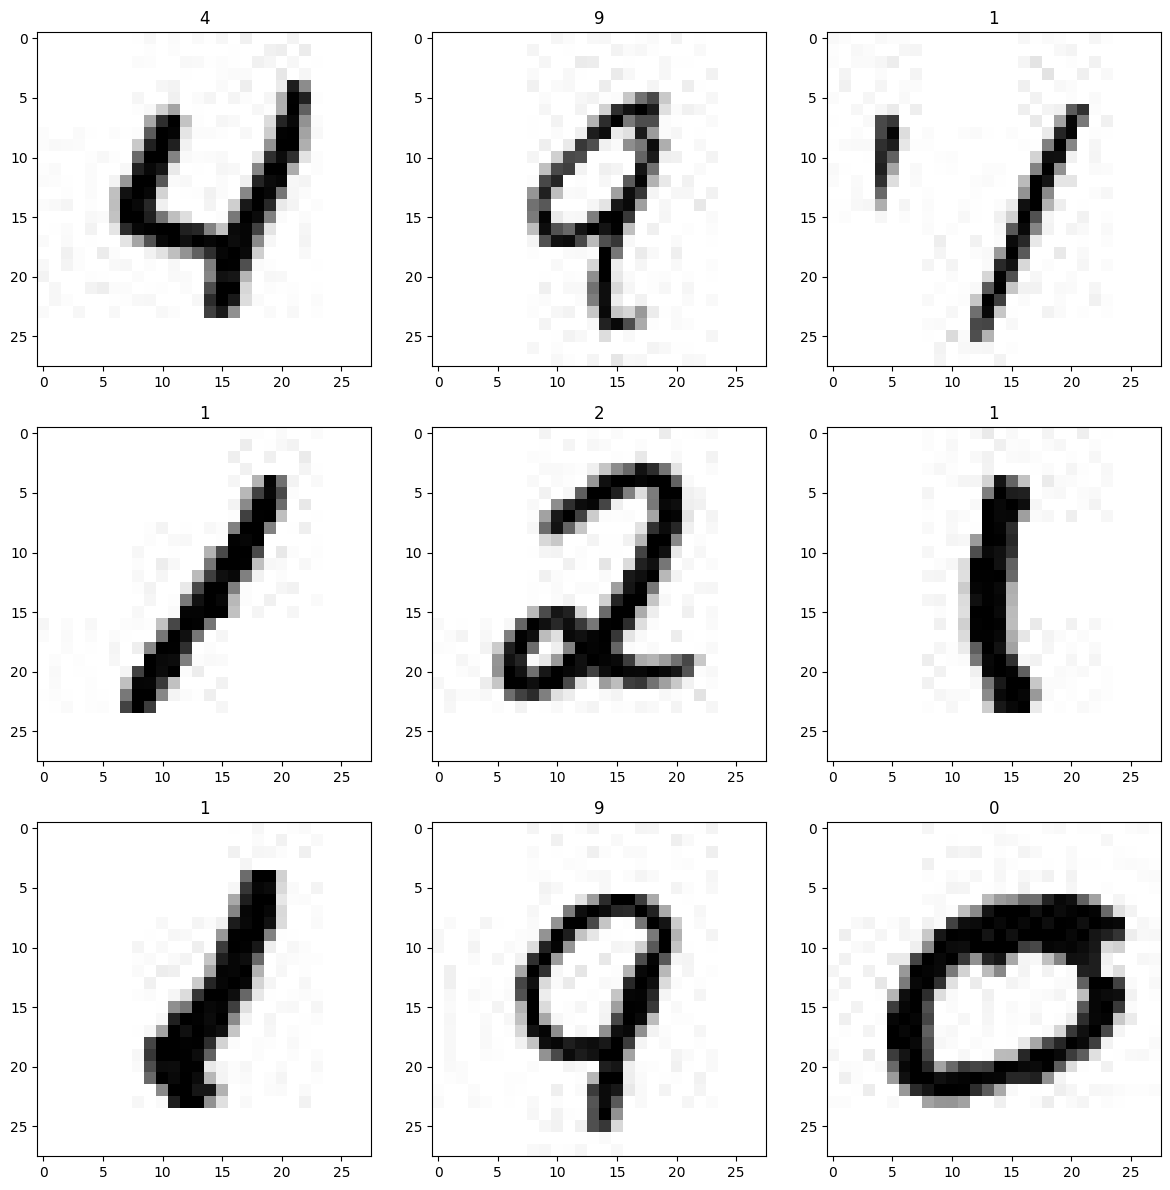

In [6]:
data_visualize(df_train)

In [7]:
# Import label encoder
ll = [9,9,4,0,0,1,2]
print(LabelEncoder().fit_transform(ll))

print(ll)

[4 4 3 0 0 1 2]
[9, 9, 4, 0, 0, 1, 2]


In [8]:
# Check out a random image as well as its prediction
# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.
  
  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """ 
  np.random.seed(random_state_global+1)
  plt.figure(figsize=(12, 12))
  for iter in range(9):
    ax = plt.subplot(3, 3, iter + 1)
    
    # global seed
    # Setup random integer
    i = np.random.randint(0, len(images))
    
    # Create predictions and targets
    target_image = images.iloc[i,:]
    pred_probs = model.predict(tf.reshape(target_image, shape=(1,784)), verbose=0) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(tf.reshape(target_image, shape=(28,28)), cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel(f'Pred: {pred_label} with {100*tf.reduce_max(pred_probs):.0f}% accuracy (True: {true_label})', color=color)

    # plt.axis(False)
  plt.tight_layout()

def testingImages(model):
    for i in range(1):
        plot_random_image(model=model, 
                    images=df_test.iloc[:,:-1], 
                    true_labels=df_test.iloc[:,-1], 
                    classes=[0,1,2,4,9])


In [9]:
i = np.random.randint(0, 5)
i

2

In [10]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)
    

def inferences(df_model_history, model):
    print(f'Training Accuracy for model: {df_model_history["accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Validation Accuracy for model: {df_model_history["val_accuracy"].to_list()[-1]*100:.2f}%')
    print(f'Test Accuracy for model: {model.evaluate(df_test.iloc[:,:-1], df_test.iloc[:,-1], verbose=0)[1]*100:.2f}%')

    df_model_history.plot(title="Accuracy / Loss vs Epoch", xlabel='Epoch', ylabel='Accuracy / Loss')
    plt.show()

    df_model_history['loss'].plot(title="Average training error vs epochs", xlabel='Epoch', ylabel='Loss')
    plt.show()

def makingPredictionWithCM(model):
    #Predicting one sample
    print('y_prob_a for one sample',model.predict(tf.reshape(df_test.iloc[0,:-1], shape=(1,784)), verbose=0))

    y_true = df_test.iloc[:,-1]
    y_prob_a = model.predict(df_test.iloc[:,:-1], verbose=0)
    y_pred_a = y_prob_a.argmax(axis=1)
    make_confusion_matrix(y_true, y_pred_a, classes=list(map(lambda el: class_l_d_to_r[el], [0,1,2,3,4])))

def showResults(model, history):
    inferences(history, model)
    makingPredictionWithCM(model)
    testingImages(model)

In [11]:
# class StopOnThreshold(keras.callbacks.Callback):
#     def __init__(self, threshold):
#         super(StopOnThreshold, self).__init__()
#         self.threshold = threshold
#         self.previous_error = float('inf')
    
#     def on_epoch_end(self, epoch, logs=None):
#         current_error = logs.get('loss')
#         # print(f'\nEpoch {epoch+1} curent Err:{current_error}, Previous Err:{self.previous_error}')
#         if abs(current_error - self.previous_error) < self.threshold:
#             self.model.stop_training = True
#             print('\n\n********\nThreshold Reached\n********\n')
#         self.previous_error = current_error

class ModelSaving(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # saving the model
        if(self.model.name=='model_b'):
            if((epoch+1)%500==0):
                self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')
        else:
            self.model.save(f'{pathfinal}{self.model.name}_{epoch+1}.h5')

class HistorySaver(keras.callbacks.Callback):
    def __init__(self):
        super(HistorySaver, self).__init__()
        self.history = {}
# dict_items([('loss', 1.3612865209579468), ('accuracy', 0.46034255623817444), ('val_loss', 1.1157031059265137), ('val_accuracy', 0.6484848856925964)])
    def on_epoch_end(self, epoch, logs=None):
        for key, value in logs.items():
            self.history.setdefault(key, []).append(value)

        if(self.model.name=='model_b'):
            if((epoch+1)%500==0):
                pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)
        else:
            pd.DataFrame(self.history).to_csv(f'{pathfinal}{self.model.name}_{epoch+1}.csv', index=False)


# create the callbacks

model_saver = ModelSaving()

# not initialize HistorySaver() here initialize inside function 
# stop_on_threshold = StopOnThreshold(threshold=threshold_val)

# This means if for 5 epochs the accuracy has no progress on 
# the validation set then it would stop and store the previous best value.
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',
                                                  patience=1,
                                                  min_delta=threshold_val,
                                                  mode='min',
                                                  restore_best_weights=True, 
                                                  verbose=1)

# (i) stochastic gradient descent (SGD) algorithm -  (batch_size=1)

In [12]:
%%script echo skipping
if(i!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_a = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_a')

  # Compile the model
  model_a.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val), 
                  metrics=["accuracy"])

  # Fit the model
  history_a = model_a.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_a,
                        batch_size=batch_size_val_a,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)
  df_model_a_history = pd.DataFrame(history_a.history)
  print('\n\n\n')

  # model_a.summary()
  print(df_model_a_history)

  # saving model and data history
  # model_a.save('model_a.h5')
  # df_model_a_history.to_csv('model_a.csv', index=False)

  # lodaing model and data history
  # model_a = keras.models.load_model('model_a.h5')
  # df_model_a_history = pd.read_csv('model_a.csv')

skipping


Training Accuracy for model: 100.00%
Validation Accuracy for model: 98.16%


2023-03-19 11:28:55.027865: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-19 11:28:55.116587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test Accuracy for model: 97.97%


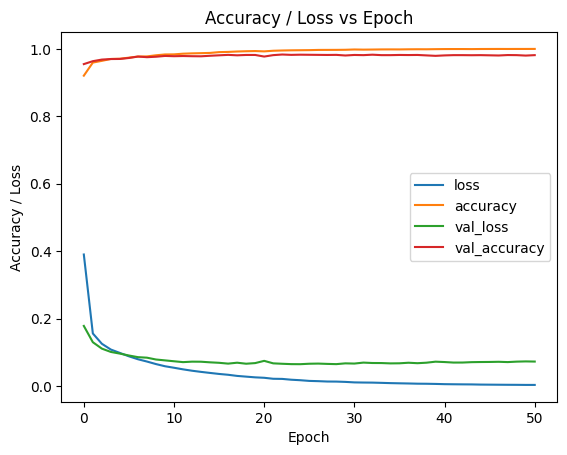

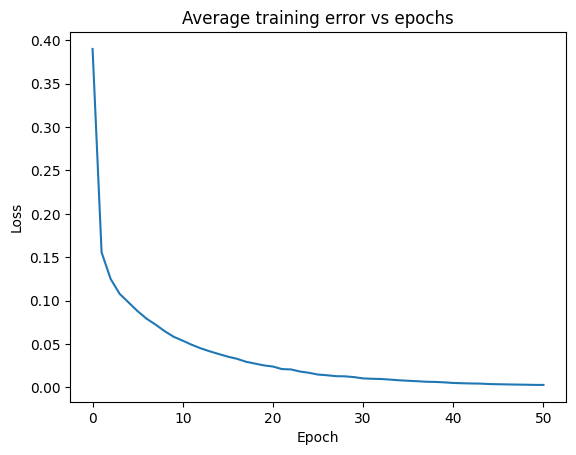

2023-03-19 11:28:56.027456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 11:28:56.106391: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


y_prob_a for one sample [[2.9198154e-05 5.5427015e-05 1.7310332e-06 6.1972401e-05 9.9985158e-01]]


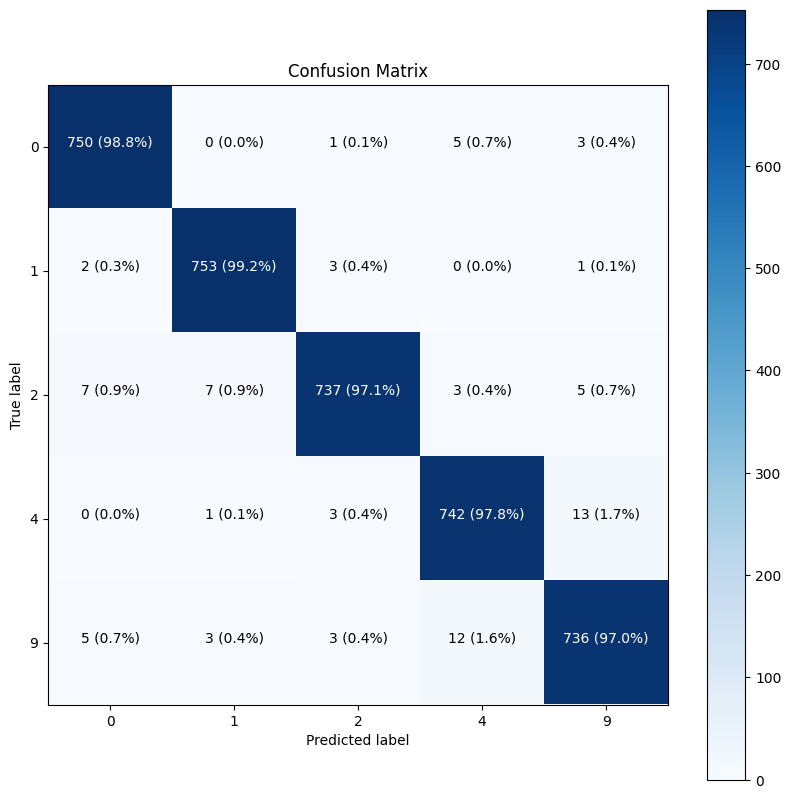

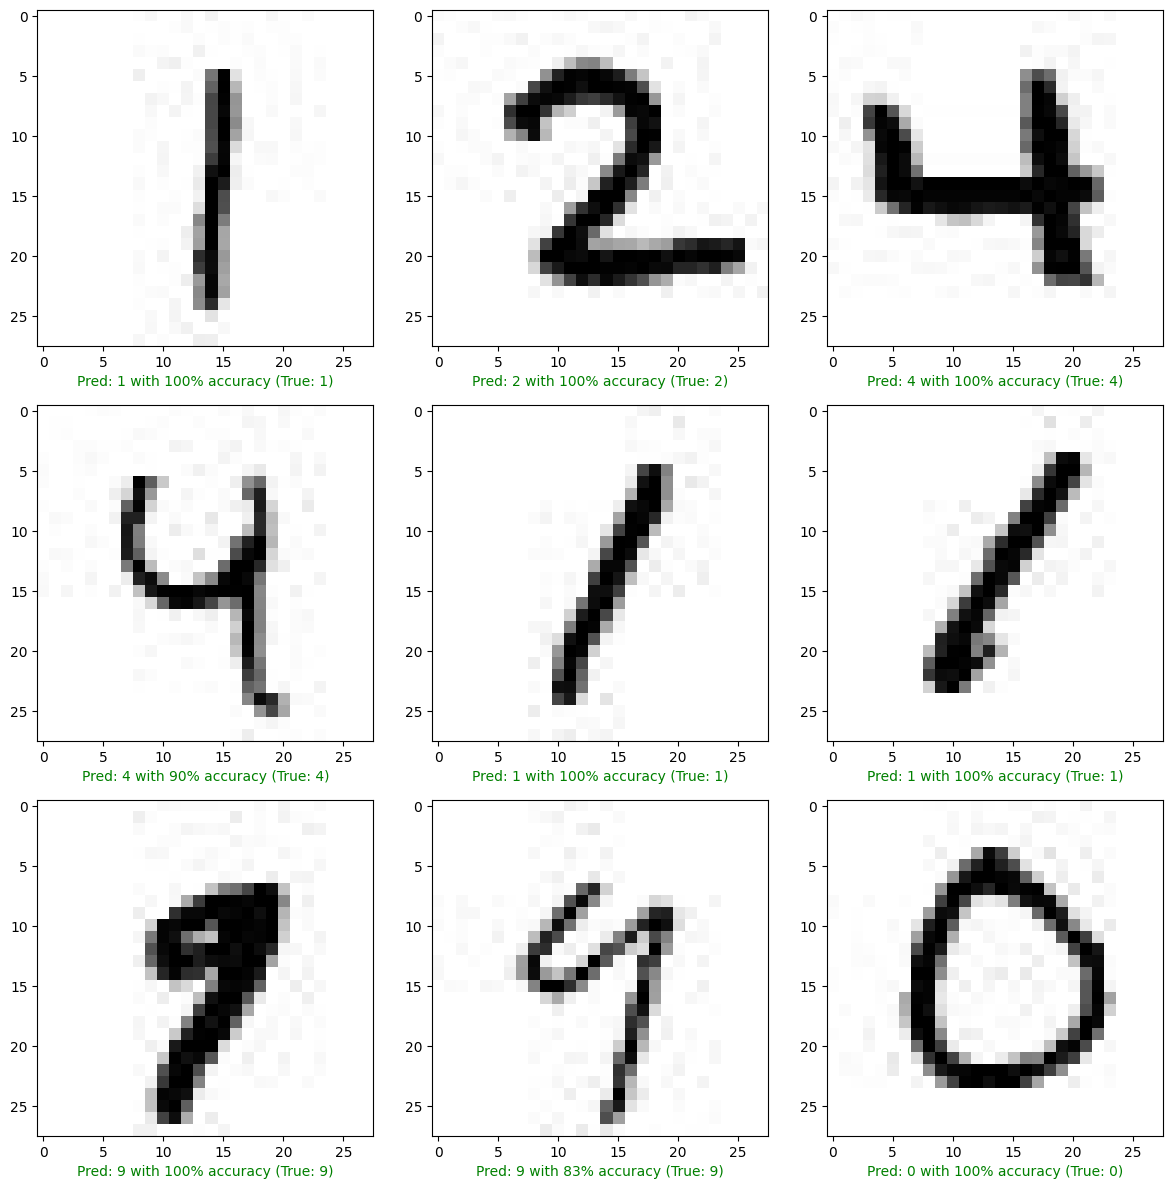

In [13]:
model_a = keras.models.load_model(f'{pathload}model_a_51.h5', compile=False)
model_a.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val), 
                  metrics=["accuracy"])
df_model_a_history = pd.read_csv(f'{pathload}model_a_51.csv')
if(i!=''):
  showResults(model_a, df_model_a_history)

# (ii) Batch  gradient  descent  algorithm  (vanilla  gradient  descent)  – (batch_size=total number of training examples),

In [14]:
%%script echo skipping

if(ii!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_b = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_b')

  # Compile the model
  model_b.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val), 
                  metrics=["accuracy"])



  # Fit the model
  history_b = model_b.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_b,
                        batch_size=batch_size_val_b,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_b_history = pd.DataFrame(history_b.history)

  df_model_b_history.to_csv(f'{pathfinal}model_b_{history_b.epoch[-1]}.csv', index=False)
  model_b.save(f'{pathfinal}model_b_{history_b.epoch[-1]}.h5')

  print('\n\n\n')
  # model_b.summary()
  print(df_model_b_history)

skipping


Training Accuracy for model: 91.74%
Validation Accuracy for model: 91.65%


2023-03-19 11:28:57.608398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test Accuracy for model: 91.38%


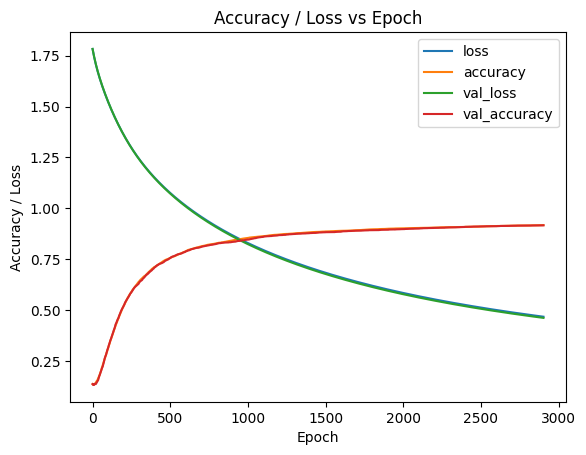

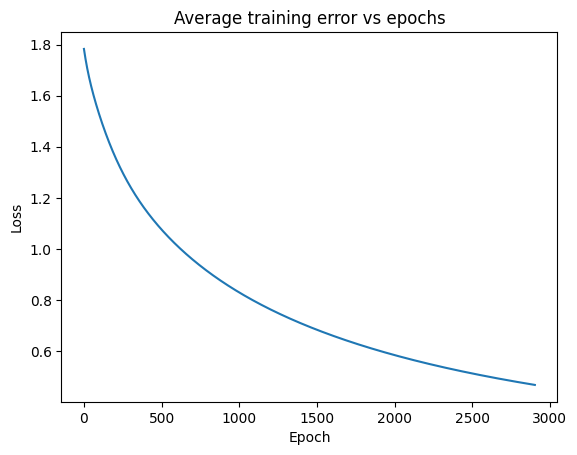

2023-03-19 11:28:58.463455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 11:28:58.528670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


y_prob_a for one sample [[0.08553698 0.01303929 0.22374323 0.06115661 0.61652386]]


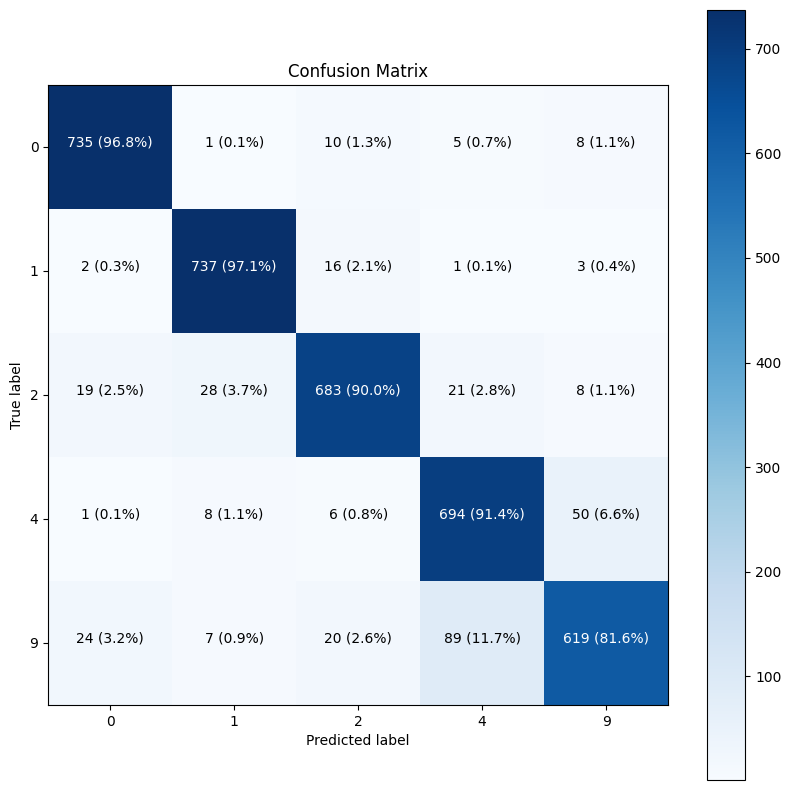

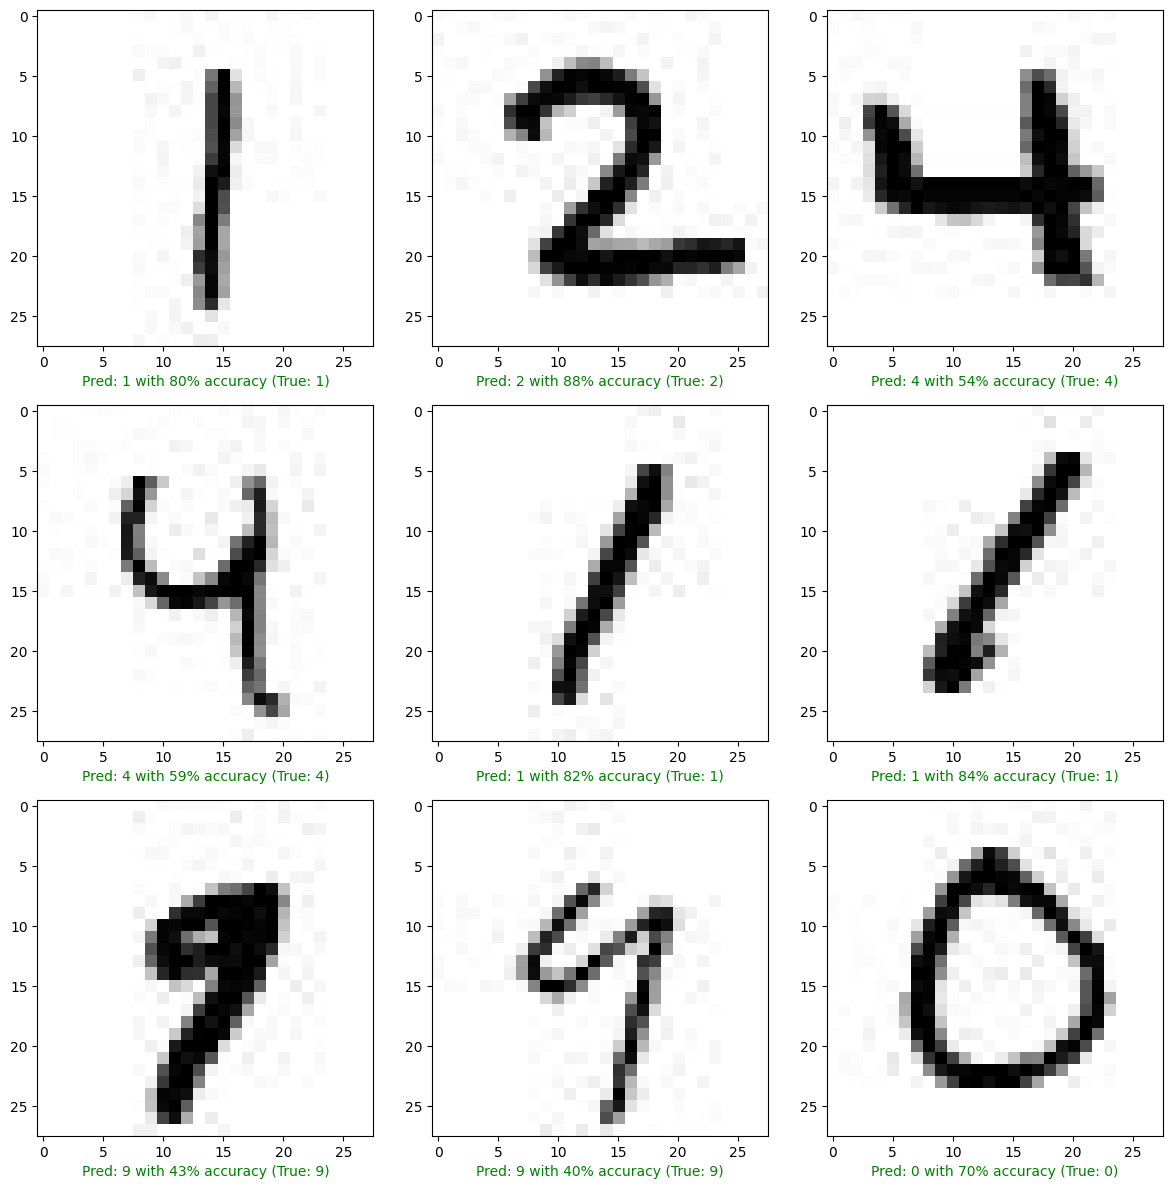

In [15]:
df_model_b_history = pd.read_csv(f'{pathload}model_b_2903.csv')
model_b = keras.models.load_model(f'{pathload}model_b_2903.h5', compile=False)
model_b.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val), 
                metrics=["accuracy"])
if(ii!=''):
  showResults(model_b, df_model_b_history)

# (iii) SGD with momentum (generalized delta rule)  –  (batch_size=1)  ,

In [16]:
%%script echo skipping

if(iii!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_c = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_c')

  # Compile the model
  model_c.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val, momentum=momentum_val), 
                  metrics=["accuracy"])


  # Fit the model
  history_c = model_c.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_c,
                        batch_size=batch_size_val_c,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_c_history = pd.DataFrame(history_c.history)

  print('\n\n\n')
  # model_c.summary()
  print(df_model_c_history)

skipping


Training Accuracy for model: 99.26%
Validation Accuracy for model: 97.50%


2023-03-19 11:28:59.985790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test Accuracy for model: 97.36%


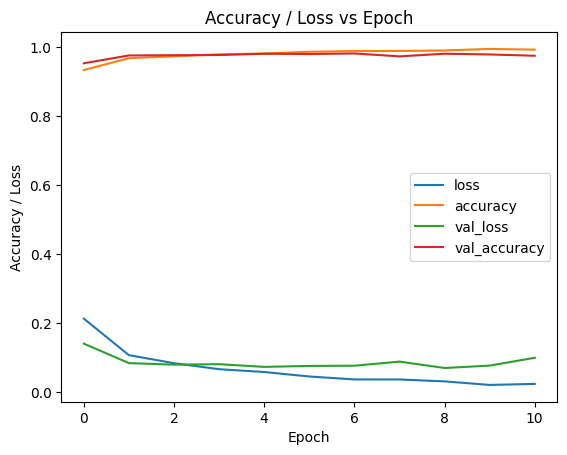

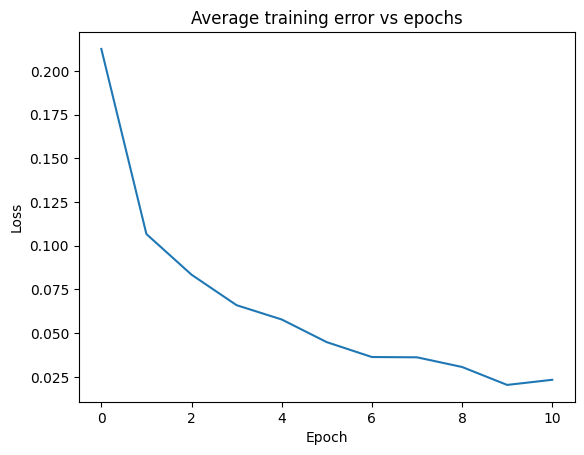

2023-03-19 11:29:00.790084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 11:29:00.861983: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


y_prob_a for one sample [[2.8069773e-05 1.1282416e-04 3.1757661e-06 2.0497866e-04 9.9965084e-01]]


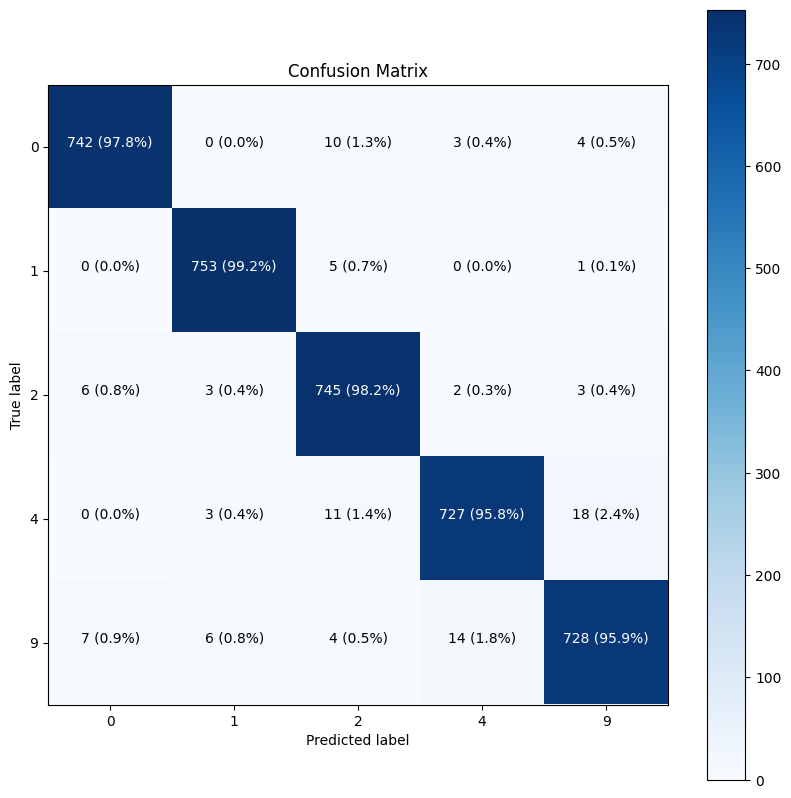

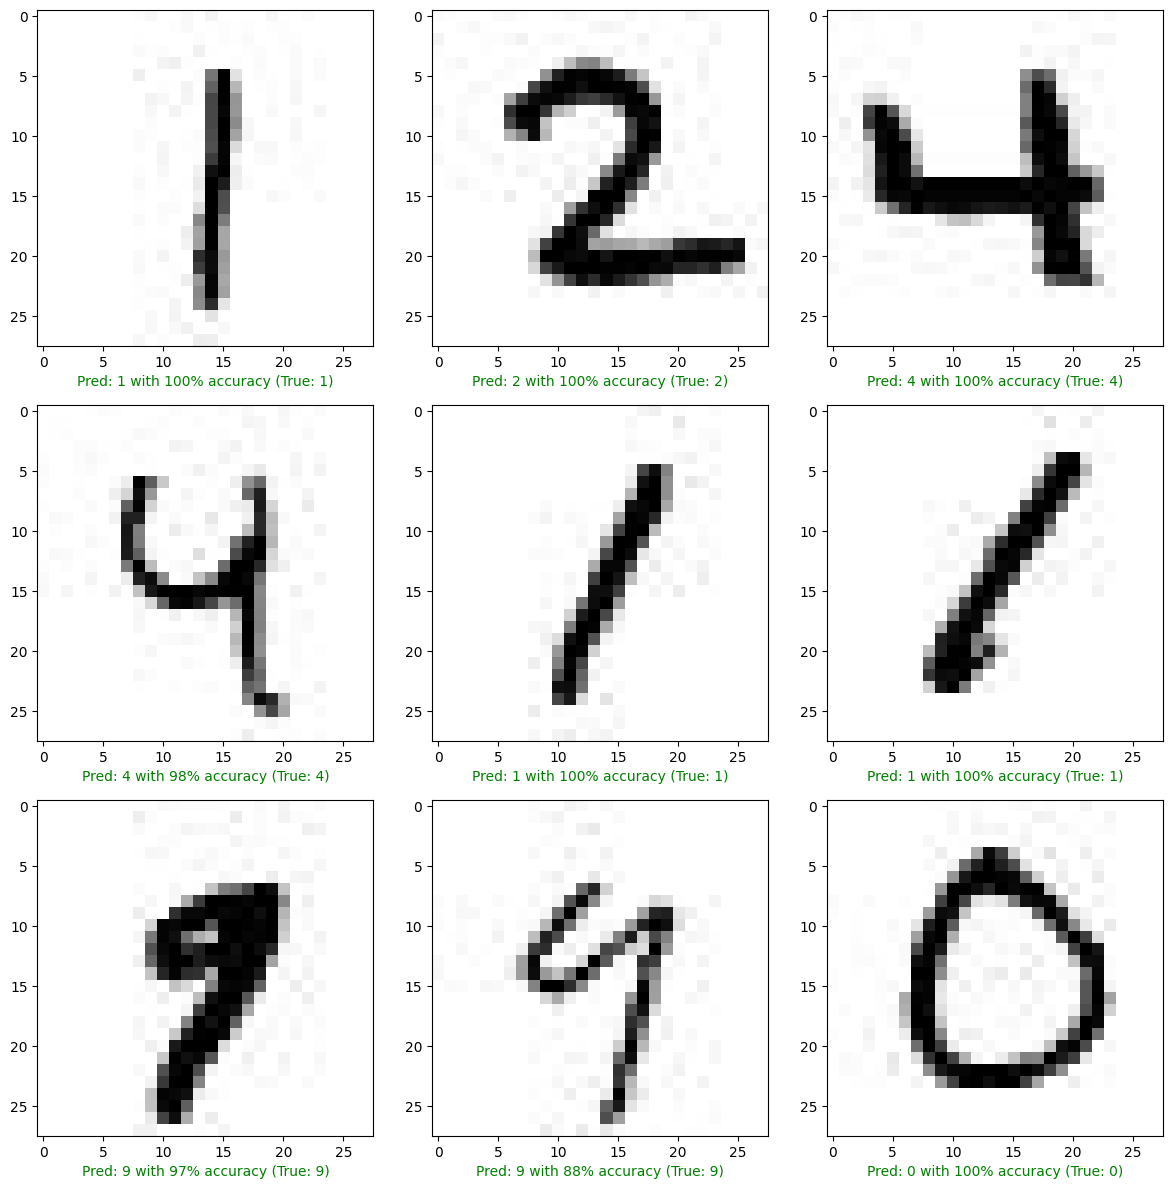

In [17]:
df_model_c_history = pd.read_csv(f'{pathload}model_c_11.csv')
model_c = keras.models.load_model(f'{pathload}model_c_11.h5', compile=False)
model_c.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val, momentum=momentum_val), 
                metrics=["accuracy"])
if(iii!=''):
  showResults(model_c, df_model_c_history)

# (iv) SGD with momentum (NAG) – (batch_size=1)

In [18]:
%%script echo skipping

if(iv!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_d = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_d')

  # Compile the model
  model_d.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val, momentum=momentum_val, nesterov=True), 
                  metrics=["accuracy"])

  # Fit the model
  history_d = model_d.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_d,
                        batch_size=batch_size_val_d,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_d_history = pd.DataFrame(history_d.history)

  print('\n\n\n')
  # model_d.summary()
  print(df_model_d_history)

skipping


Future exception was never retrieved
future: <Future finished exception=BrokenPipeError(32, 'Broken pipe')>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tensorflow/lib/python3.10/asyncio/unix_events.py", line 676, in write
    n = os.write(self._fileno, data)
BrokenPipeError: [Errno 32] Broken pipe


Training Accuracy for model: 99.16%
Validation Accuracy for model: 97.79%


2023-03-19 11:29:02.398563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test Accuracy for model: 97.10%


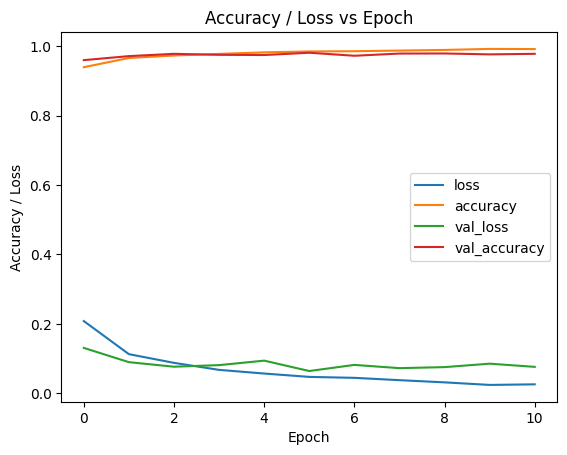

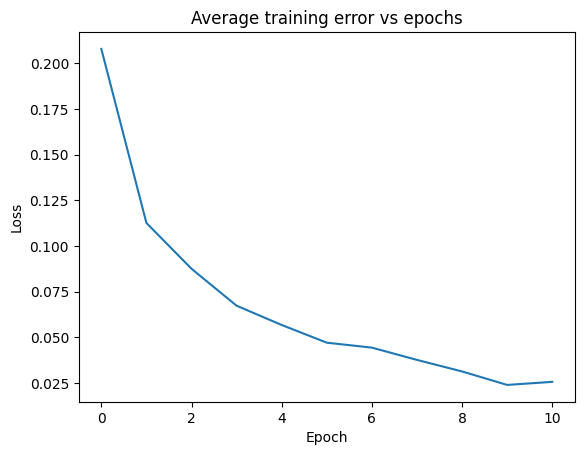

2023-03-19 11:29:03.239248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 11:29:03.306647: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


y_prob_a for one sample [[2.8684158e-06 6.8683403e-05 2.7424753e-06 1.7308227e-04 9.9975258e-01]]


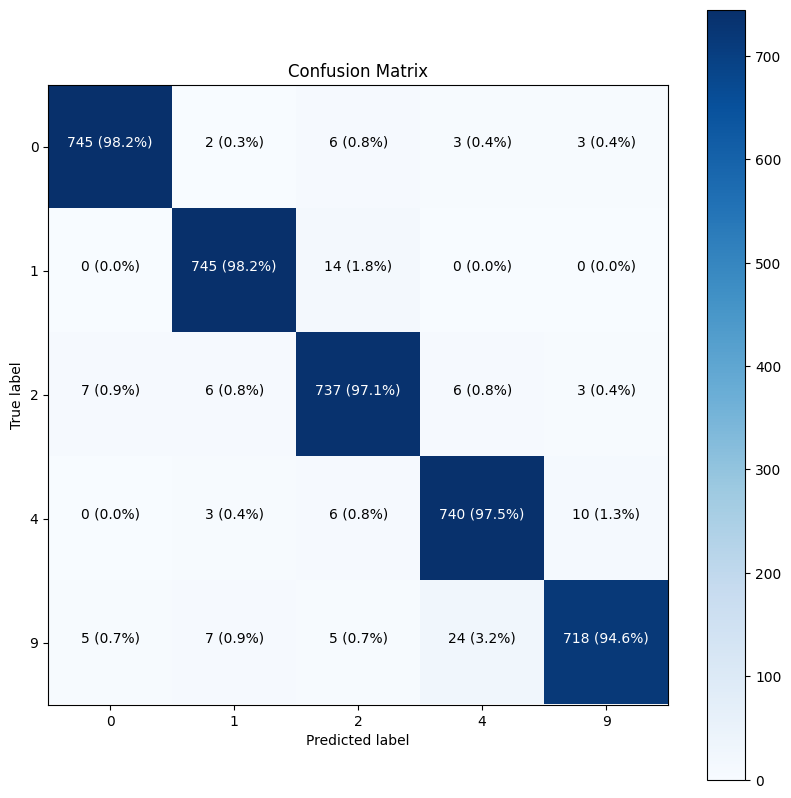

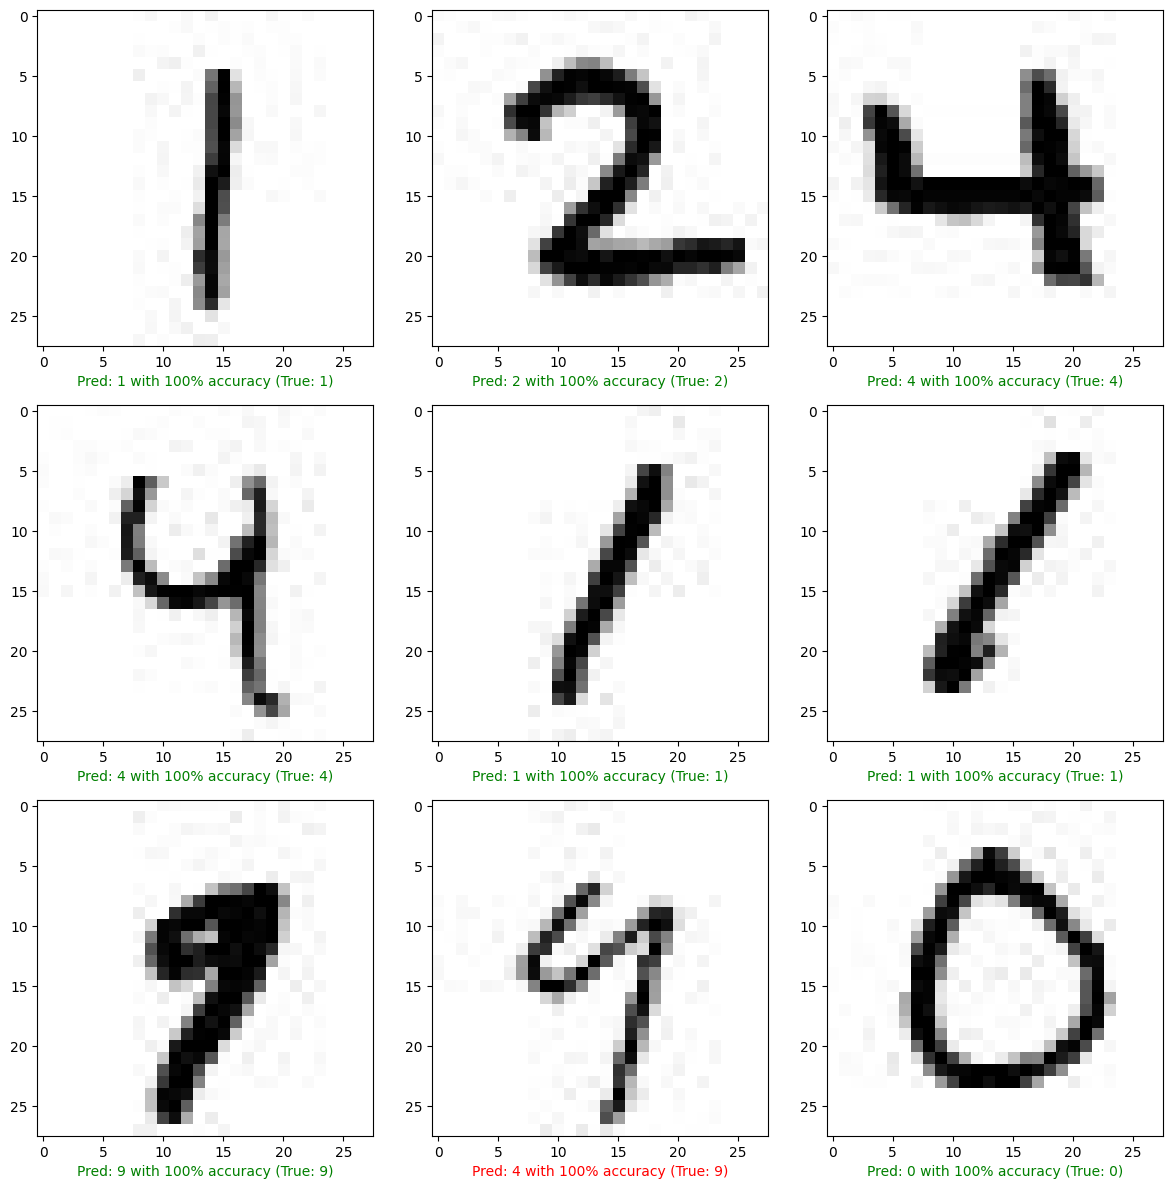

In [19]:
df_model_d_history = pd.read_csv(f'{pathload}model_d_11.csv')
model_d = keras.models.load_model(f'{pathload}model_d_11.h5', compile=False)
model_d.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.SGD(learning_rate=learning_rate_val, momentum=momentum_val, nesterov=True), 
                metrics=["accuracy"])
if(iv!=''):
  showResults(model_d, df_model_d_history)

# (v) AdaGrad – (batch_size=1)

In [20]:
%%script echo skipping

if(v!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_e = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_e')

  # Compile the model
  model_e.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adagrad(learning_rate=learning_rate_val), 
                  metrics=["accuracy"])


  # Fit the model
  history_e = model_e.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_e,
                        batch_size=batch_size_val_e,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_e_history = pd.DataFrame(history_e.history)

  print('\n\n\n')
  # model_e.summary()
  print(df_model_e_history)

skipping


Training Accuracy for model: 98.01%
Validation Accuracy for model: 97.36%


2023-03-19 11:29:04.691453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test Accuracy for model: 97.15%


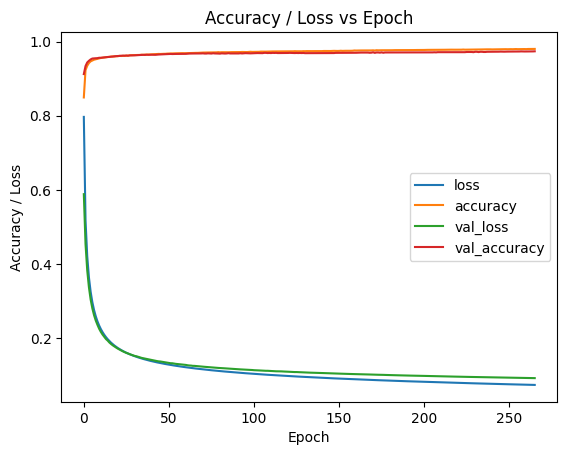

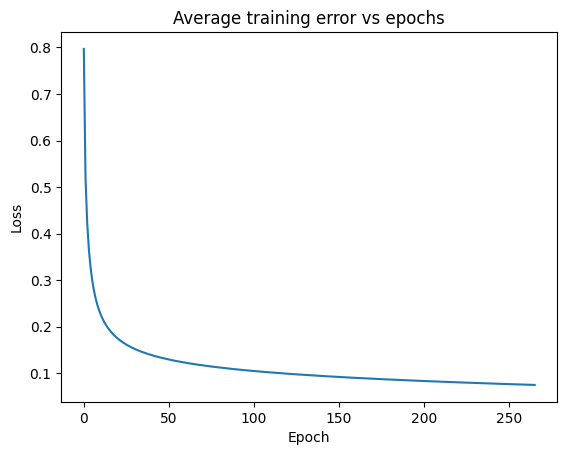

2023-03-19 11:29:05.488622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 11:29:05.555642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


y_prob_a for one sample [[5.0617667e-04 1.1615877e-03 6.7343600e-03 4.6806815e-03 9.8691726e-01]]


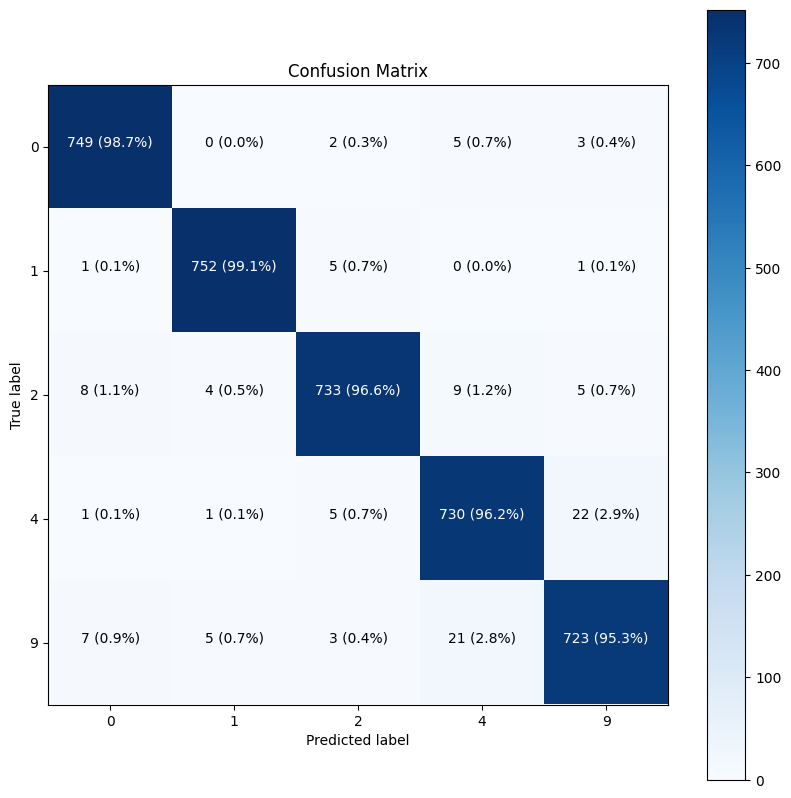

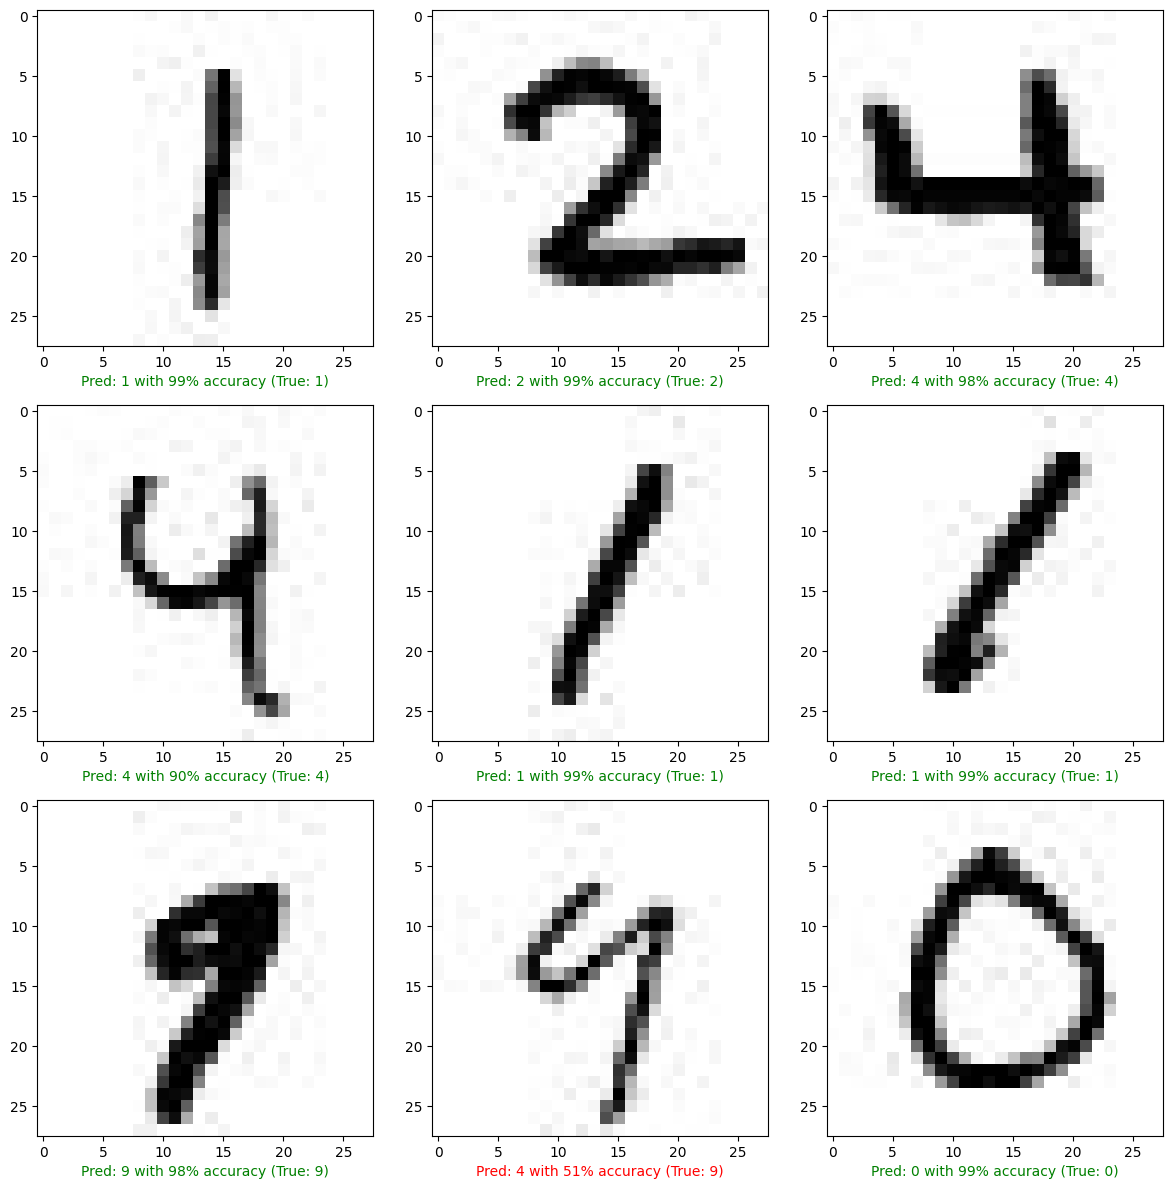

In [21]:
df_model_e_history = pd.read_csv(f'{pathload}model_e_266.csv')
model_e = keras.models.load_model(f'{pathload}model_e_266.h5', compile=False)
model_e.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.Adagrad(learning_rate=learning_rate_val), 
                metrics=["accuracy"])
if(v!=''):
  showResults(model_e, df_model_e_history)

# (vi) RMSProp – (batch_size=1)

In [22]:
%%script echo skipping

if(vi!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_f = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_f')

  # Compile the model
  model_f.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate_val, epsilon=epsilon_val), 
                  metrics=["accuracy"])

  # Fit the model
  history_f = model_f.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_f,
                        batch_size=batch_size_val_f,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_f_history = pd.DataFrame(history_f.history)

  print('\n\n\n')
  # model_f.summary()
  print(df_model_f_history)

skipping


Training Accuracy for model: 97.22%
Validation Accuracy for model: 96.84%


2023-03-19 11:29:07.082550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test Accuracy for model: 97.02%


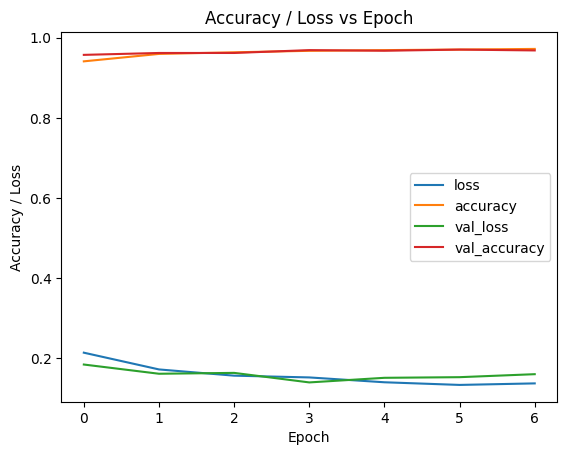

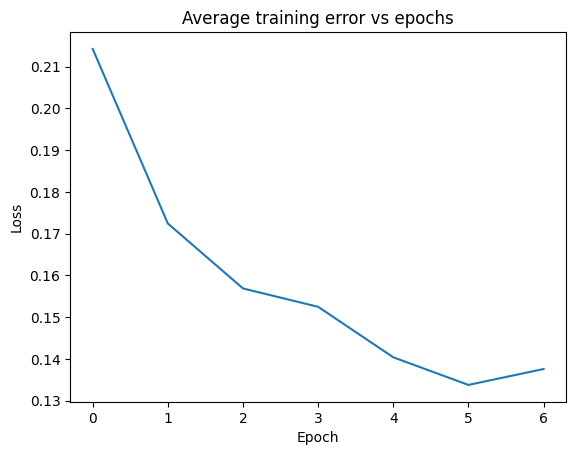

2023-03-19 11:29:07.895684: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 11:29:07.965180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


y_prob_a for one sample [[4.0104670e-08 7.7932555e-06 1.0511450e-05 2.9708666e-04 9.9968469e-01]]


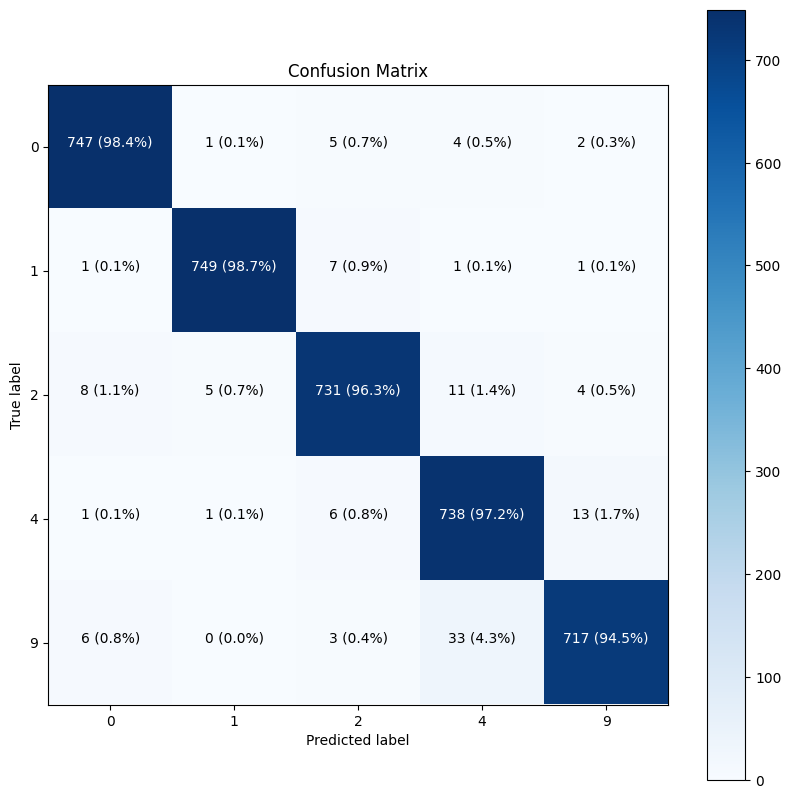

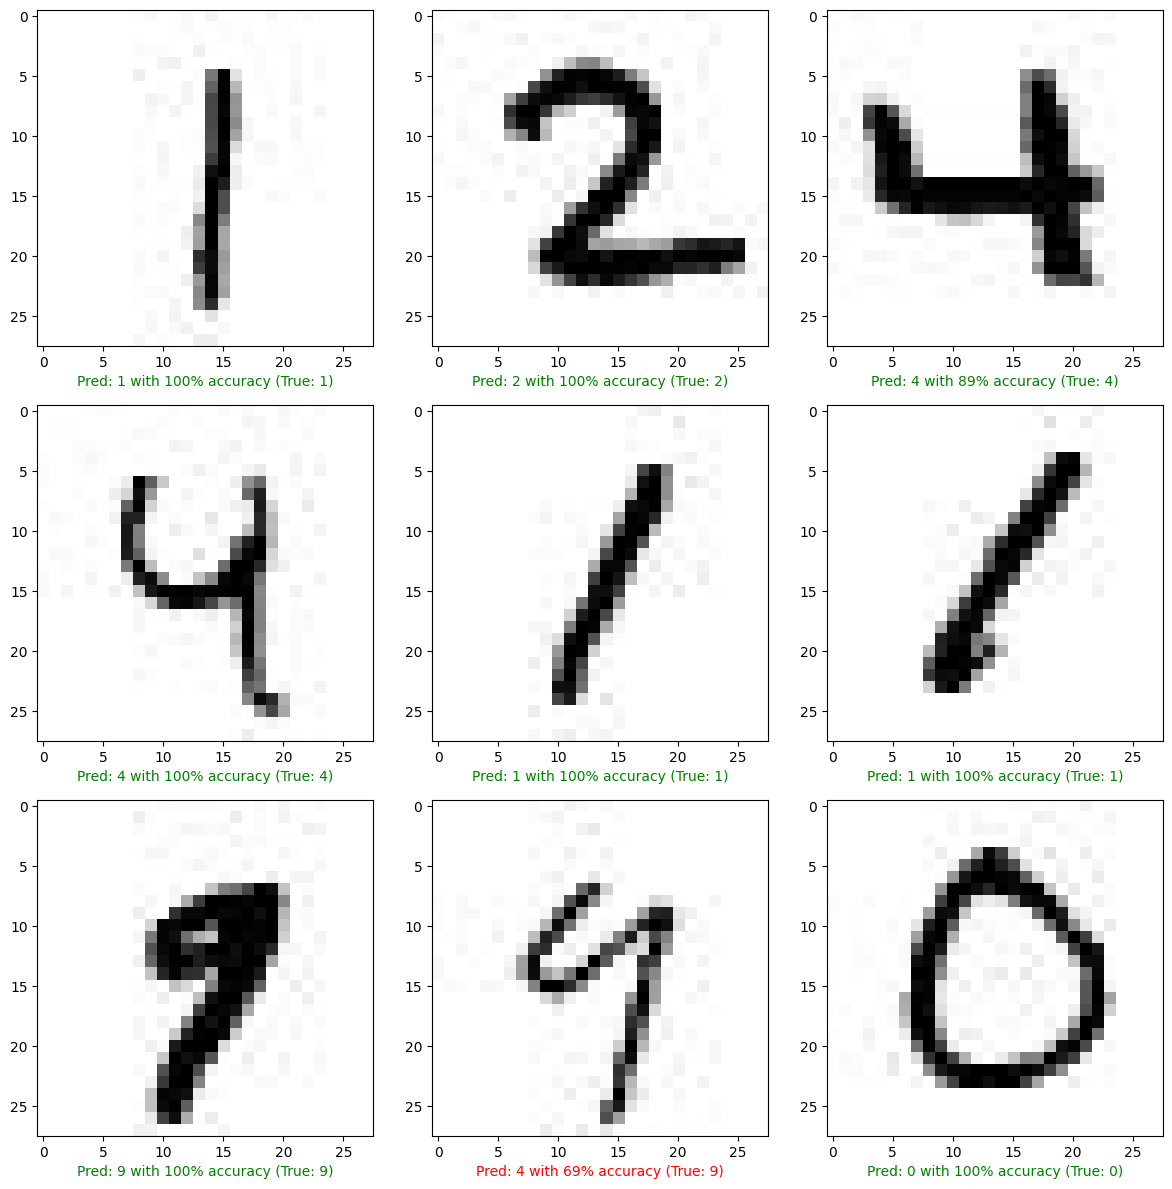

In [23]:
df_model_f_history = pd.read_csv(f'{pathload}model_f_7.csv')
model_f = keras.models.load_model(f'{pathload}model_f_7.h5', compile=False)
model_f.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                optimizer=keras.optimizers.RMSprop(learning_rate=learning_rate_val, epsilon=epsilon_val), 
                metrics=["accuracy"])
if(vi!=''):
  showResults(model_f, df_model_f_history)

# (vii) Adam optimizer – (batch_size=1)

In [24]:
%%script echo skipping

if(vii!=''):
  # Set random seed
  tf.random.set_seed(random_state_global)

  # Create the model
  model_g = keras.Sequential([
    keras.Input(shape=(784,), name="Input_layer"),
    keras.layers.Dense(Hidden_layer_I_N, activation=Hidden_layer_Activation, name="Hidden_layer_I"),
    keras.layers.Dense(Hidden_layer_II_N, activation=Hidden_layer_Activation, name="Hidden_layer_II"),
    keras.layers.Dense(Hidden_layer_III_N, activation=Hidden_layer_Activation, name="Hidden_layer_III"),
    keras.layers.Dense(Output_layer_N, activation=Output_layer_Activation, name="Output_layer")
  ], name='model_g')

  # Compile the model
  model_g.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val, 
                                                  epsilon=epsilon_val,
                                                  beta_1=beta_1_val,
                                                  beta_2=beta_2_val), 
                  metrics=["accuracy"])

  # Fit the model
  history_g = model_g.fit(df_train.iloc[:,:-1],
                        df_train.iloc[:,-1],
                        epochs=epoch_val_g,
                        batch_size=batch_size_val_g,
                        validation_data=(df_valid.iloc[:,:-1], df_valid.iloc[:,-1]),
                        callbacks=[model_saver, HistorySaver(), early_stopping_cb], verbose=0)

  df_model_g_history = pd.DataFrame(history_g.history)

  print('\n\n\n')
  # model_g.summary()
  print(df_model_g_history)

skipping


Training Accuracy for model: 99.46%
Validation Accuracy for model: 98.08%


2023-03-19 11:29:09.396074: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Test Accuracy for model: 97.71%


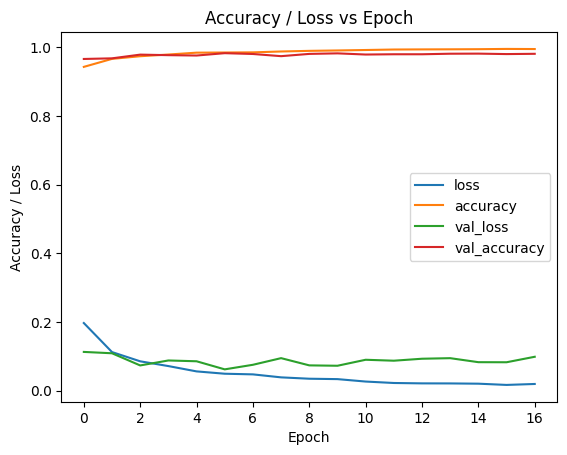

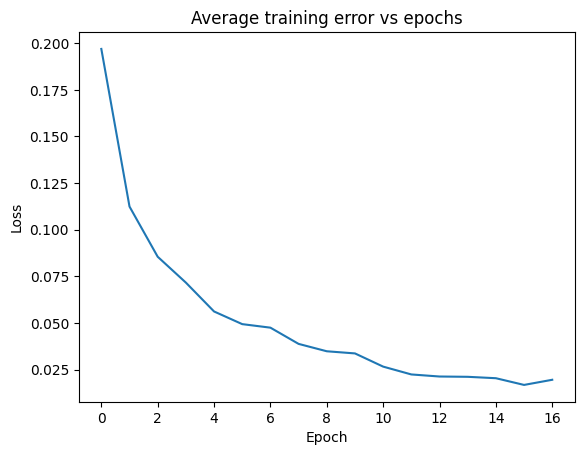

2023-03-19 11:29:10.257909: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-19 11:29:10.326292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


y_prob_a for one sample [[2.9145134e-05 5.9976114e-06 2.4517940e-05 7.8138011e-04 9.9915886e-01]]


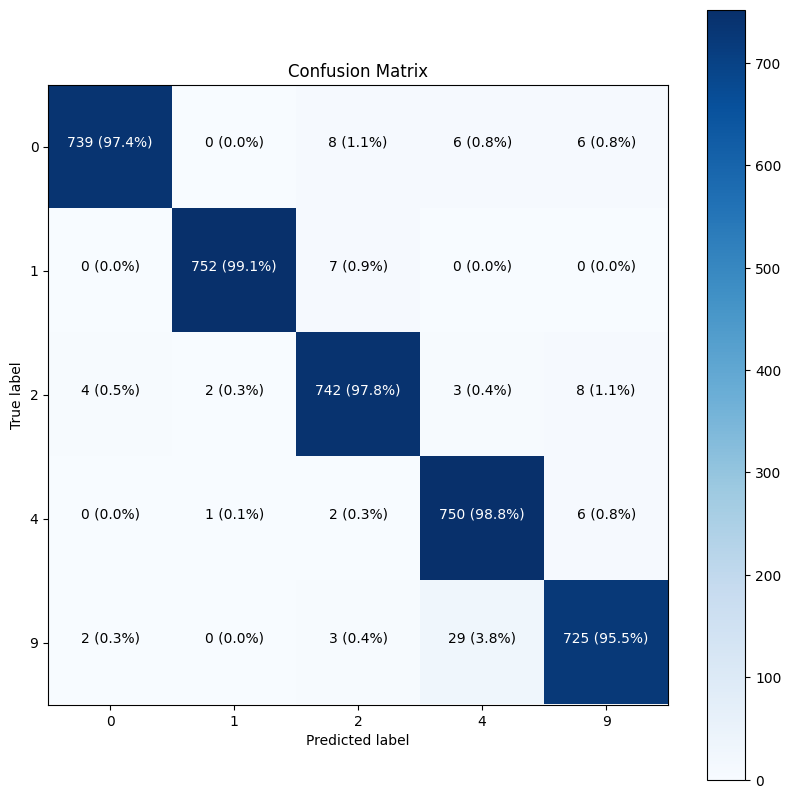

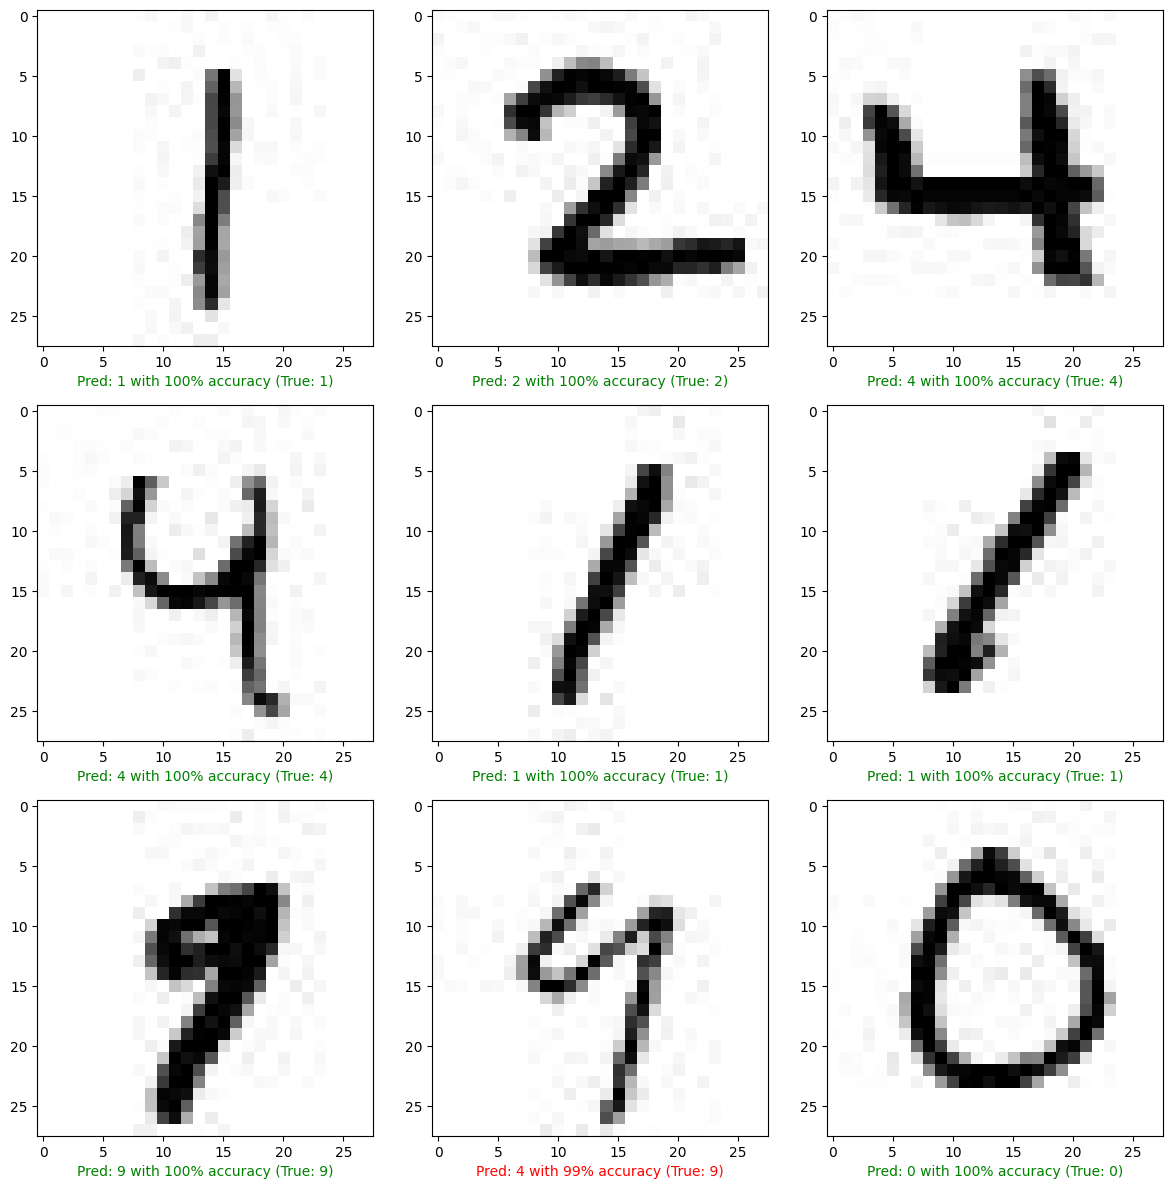

In [25]:
df_model_g_history = pd.read_csv(f'{pathload}model_g_17.csv')
model_g = keras.models.load_model(f'{pathload}model_g_17.h5', compile=False)
model_g.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
                  optimizer=keras.optimizers.Adam(learning_rate=learning_rate_val, 
                                                  epsilon=epsilon_val,
                                                  beta_1=beta_1_val,
                                                  beta_2=beta_2_val), 
                  metrics=["accuracy"])
if(vii!=''):
  showResults(model_g, df_model_g_history)

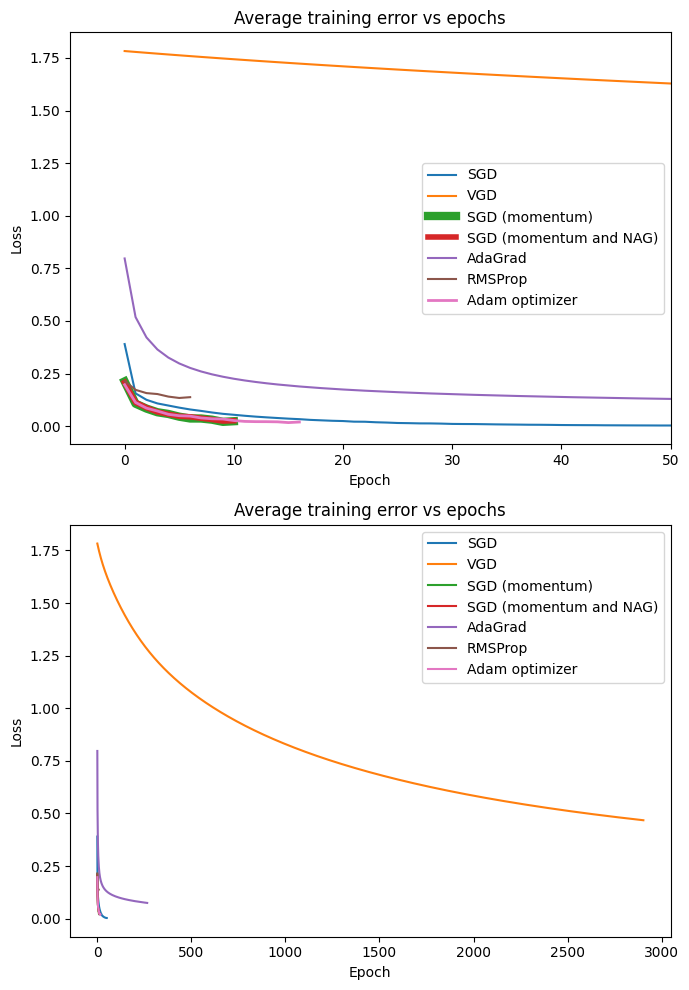

In [26]:
if(al!=''):
  plt.figure(figsize=(7, 10))
  
  plt.subplot(2,1,1)
  plt.plot(df_model_a_history['loss'], label='SGD')
  plt.plot(df_model_b_history['loss'], label='VGD')
  plt.plot(df_model_c_history['loss'], label='SGD (momentum)', linewidth=6)
  plt.plot(df_model_d_history['loss'], label='SGD (momentum and NAG)', linewidth=4)
  plt.plot(df_model_e_history['loss'], label='AdaGrad')
  plt.plot(df_model_f_history['loss'], label='RMSProp')
  plt.plot(df_model_g_history['loss'], label='Adam optimizer', linewidth=2)
  plt.title("Average training error vs epochs")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.xlim([-5, 50])
  plt.legend()

  plt.subplot(2,1,2)
  plt.plot(df_model_a_history['loss'], label='SGD')
  plt.plot(df_model_b_history['loss'], label='VGD')
  plt.plot(df_model_c_history['loss'], label='SGD (momentum)')
  plt.plot(df_model_d_history['loss'], label='SGD (momentum and NAG)')
  plt.plot(df_model_e_history['loss'], label='AdaGrad')
  plt.plot(df_model_f_history['loss'], label='RMSProp')
  plt.plot(df_model_g_history['loss'], label='Adam optimizer')
  plt.title("Average training error vs epochs")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

  plt.tight_layout()
  plt.show()


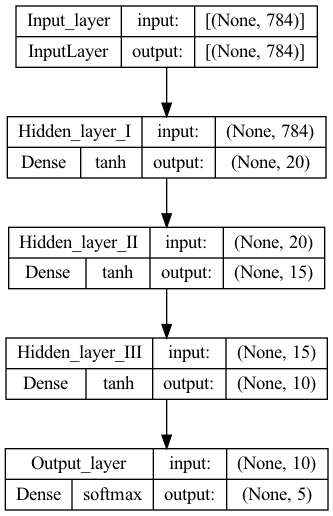

In [27]:
plot_model(model_g, show_shapes=True, show_layer_activations=True)